In [1]:
#import pandas
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
# reomve the first row
pima=pima.iloc[1:]

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima["label"]=pd.to_numeric(pima["label"])

In [6]:
# it is a string !!!!
pima["bp"][1]

'72'

In [7]:
pima.describe()

,label
count,768.000000
mean,0.348958
std,0.476951
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
pima.label.unique()

array([1, 0])

# Goal : Condition

In [9]:
pima[pima["label"]==1].shape

(268, 9)

In [10]:
pima.label.isnull().any()

False

In [11]:
import seaborn as sns

In [12]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
pregnant    768 non-null object
glucose     768 non-null object
bp          768 non-null object
skin        768 non-null object
insulin     768 non-null object
bmi         768 non-null object
pedigree    768 non-null object
age         768 non-null object
label       768 non-null int64
dtypes: int64(1), object(8)
memory usage: 54.1+ KB


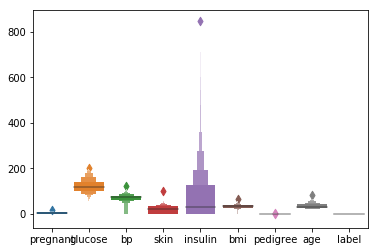

In [13]:
sns.boxenplot(data=pima)

In [14]:
pima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

## Taget data is label ( categorical value)

In [15]:
pima.label.unique()

array([1, 0])

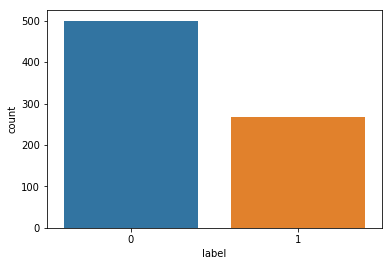

In [16]:
import seaborn as sns
sns.countplot(pima['label'],label="Count")

## How many person is diabetic ( label == 1 )?

In [17]:
pima[pima["label"]==1].shape[0]

268

# How many person jawou behi ( label == 0 ) ?

In [18]:
pima[pima["label"]==0].shape[0]

500

In [19]:
pima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

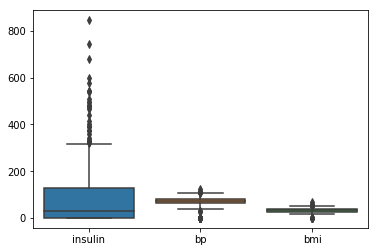

In [20]:
import seaborn as sns
ax = sns.boxplot( data=pima[["insulin","bp","bmi"]])

In [21]:
pima[pima["label"]==1][["insulin"]].min()

insulin    0.0
dtype: float64

In [22]:
pima[pima["label"]=="0"][["insulin"]].min()

/home/helmi/.local/lib/python3.5/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


insulin   NaN
dtype: float64

In [23]:
pima["age"][1]

'50'

In [24]:
def set_age(row):
    if int(row["age"]) < 25 :
        return "sa8roun"
    if int(row["age"] )>=25 and int(row["age"])<=50:
        return "adult"
    if int(row["age"] )>= 51:
        return "Kbiiir"        

In [25]:
pima["Age_Distribution"]= pima.apply(lambda row : set_age(row), axis=1)

In [26]:
pima.Age_Distribution.unique()

array(['adult', 'sa8roun', 'Kbiiir'], dtype=object)

In [27]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label,Age_Distribution
1,6,148,72,35,0,33.6,0.627,50,1,adult
2,1,85,66,29,0,26.6,0.351,31,0,adult
3,8,183,64,0,0,23.3,0.672,32,1,adult
4,1,89,66,23,94,28.1,0.167,21,0,sa8roun
5,0,137,40,35,168,43.1,2.288,33,1,adult


In [28]:
#sns.barplot(x="Age_Distribution",y= "label" , data=pima)

In [29]:
#pima = pima[pima.label !='Outcome']

# Split data into features and target

#### we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [30]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [31]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
1,6,0,33.6,50,148,72,0.627
2,1,0,26.6,31,85,66,0.351
3,8,0,23.3,32,183,64,0.672
4,1,94,28.1,21,89,66,0.167
5,0,168,43.1,33,137,40,2.288


In [32]:
y.head()

1    1
2    0
3    1
4    0
5    1
Name: label, dtype: int64

# Splitting Data into test and train


#### Dividing the dataset into a training set and a test set is a good strategy in order to understand the performance of the model.

#### Stack overflow :Try substituting cross_validation -> model_selection

In [33]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### It means 75% data will be used for model training and 25% for model testing.

In [34]:
pima.shape

(768, 10)

In [35]:
X_train.shape

(576, 7)

In [36]:
X_test.shape

(192, 7)

In [37]:
len(y_train)

576

In [38]:
len(y_test)

192

# Model Development and Prediction

In [39]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


/home/helmi/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
# Predict the test X
y_pred=logreg.predict(X_test)

In [41]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [42]:
X_test[:7]

,pregnant,insulin,bmi,age,glucose,bp,pedigree
662,1,0,42.9,22,199,76,1.394
123,2,100,33.6,23,107,74,0.404
114,4,0,34,25,76,62,0.391
15,5,175,25.8,51,166,72,0.587
530,0,0,24.6,31,111,65,0.66
104,1,40,26.6,24,81,72,0.283
339,9,171,34.2,33,152,78,0.893


### the acutual value

In [43]:
y_test[:7]

662    1
123    0
114    0
15     1
530    0
104    0
339    1
Name: label, dtype: int64

### the predicted value

In [44]:
logreg.predict(X_test[:7])

array([1, 0, 0, 1, 0, 0, 1])

# Model Evaluation using Confusion Matrix


### A confusion matrix is a table that is used to evaluate the performance of a classification model.

In [45]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

#### The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

# Visualizing Confusion Matrix using Heatmap

In [46]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

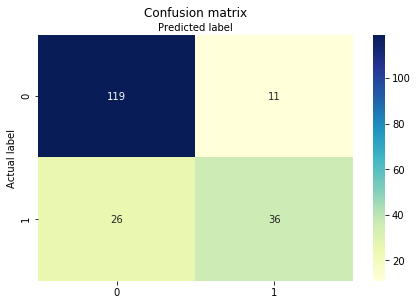

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8072916666666666


## PRECISION : how many selected items are correct


In [49]:
36/(36+11)

0.7659574468085106

## RECALL : how many correct items were selected

In [50]:
s=0
for i in y_test.values:
    if i == '1' :
        s+=1

In [51]:
s

0

In [52]:
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [53]:
y_test.value_counts()[1]

62

#### 36 we7ed tala3hom diabetique ouhouma bel7a9 diabetique (true possitie) , 62 : all diabetics

In [54]:
(36)/62

0.5806451612903226

###  If there are patients who have diabetes in the test set, your Logistic Regression model can identify it 58% of the time.